In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [8]:
df=pd.read_csv('DS assignment.csV')

In [9]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,04-07-1905,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,04-07-1905,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,05-07-1905,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,05-07-1905,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,04-07-1905,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [4]:
df.shape

(414, 9)

In [5]:
df.isna().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [12]:
df.columns=df.columns.str.replace(' ','_').str.lower()

In [15]:
df['transaction_date']=pd.to_datetime(df['transaction_date'])

In [16]:
df['transaction_date'].unique()

array(['1905-04-07T00:00:00.000000000', '1905-05-07T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [17]:
df.head()

,transaction_date,house_age,distance_from_nearest_metro_station_(km),number_of_convenience_stores,latitude,longitude,number_of_bedrooms,house_size_(sqft),house_price_of_unit_area
0,1905-04-07,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,1905-04-07,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,1905-05-07,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,1905-05-07,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,1905-04-07,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [19]:
df.groupby(['transaction_date'])['house_price_of_unit_area'].mean()

transaction_date
1905-04-07    36.304762
1905-05-07    38.713194
Name: house_price_of_unit_area, dtype: float64

In [35]:
df['transaction_date']=df['transaction_date'].dt.date

In [105]:
def correlation(df):
    return df.corr(method='spearman',numeric_only=True)['house_price_of_unit_area']

In [21]:
correlation(df)

C:\Users\sanja\AppData\Local\Temp\ipykernel_36420\1197036511.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  return df.corr(method='spearman')['house_price_of_unit_area']


house_age                                  -0.281753
distance_from_nearest_metro_station_(km)   -0.775948
number_of_convenience_stores                0.617333
latitude                                    0.578419
longitude                                   0.437672
number_of_bedrooms                          0.061932
house_size_(sqft)                           0.050732
house_price_of_unit_area                    1.000000
Name: house_price_of_unit_area, dtype: float64

In [47]:
df['transaction_date']=df['transaction_date'].map({datetime.date(1905, 4, 7):0}).fillna(value=1)

In [49]:
correlation(df)

transaction_date                            0.067250
house_age                                  -0.281753
distance_from_nearest_metro_station_(km)   -0.775948
number_of_convenience_stores                0.617333
latitude                                    0.578419
longitude                                   0.437672
number_of_bedrooms                          0.061932
house_size_(sqft)                           0.050732
house_price_of_unit_area                    1.000000
Name: house_price_of_unit_area, dtype: float64

In [52]:
def draw_the_histplot(df,col):
    sns.histplot(df[col],bins=3)

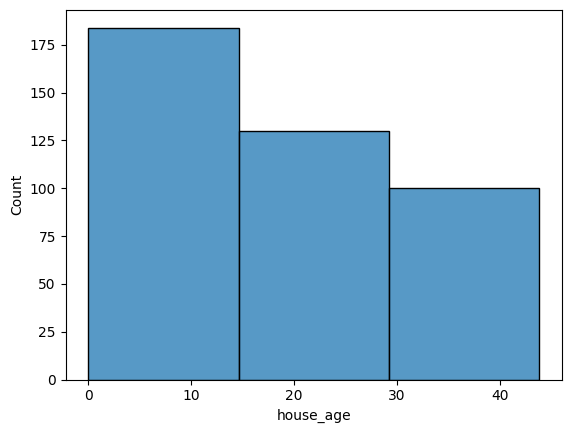

In [53]:
draw_the_histplot(df,'house_age')

In [57]:
def giv_range(df,col):
    return plt.hist(df[col],bins=3)[1]

In [65]:
def make_bins(df,col):
    ctpt=giv_range(df,col)
    ctpt[0]=ctpt[0]-1
    labels=['low','mid','high']
    df[col+'_range']=pd.cut(df[col],ctpt,labels=labels)
    return df

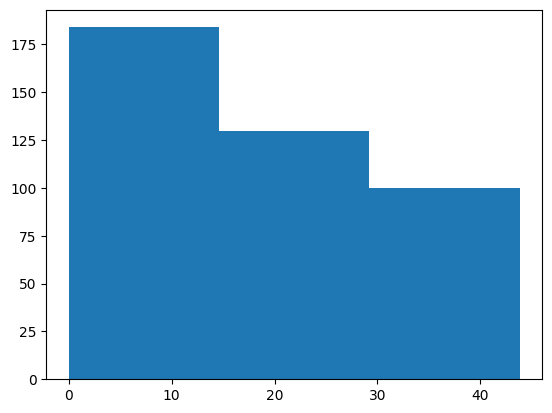

In [67]:
df=make_bins(df,'house_age')

In [70]:
house_price=df.groupby(['house_age_range'])['house_price_of_unit_area'].mean().to_dict()

In [73]:
def replace_func(df,p,col):
    df[col]=df[col].replace(p).astype(float)

In [74]:
replace_func(df,house_price,'house_age_range')

In [77]:
df.head()

,transaction_date,house_age,distance_from_nearest_metro_station_(km),number_of_convenience_stores,latitude,longitude,number_of_bedrooms,house_size_(sqft),house_price_of_unit_area,house_age_range
0,0.0,32.0,84.87882,10,24.98298,121.54024,1,575,37.9,37.201000
1,0.0,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2,32.376744
2,1.0,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3,42.308649
3,1.0,13.3,561.98450,5,24.98746,121.54391,2,875,54.8,42.308649
4,0.0,5.0,390.56840,5,24.97937,121.54245,1,491,43.1,42.308649


<AxesSubplot: xlabel='distance_from_nearest_metro_station_(km)', ylabel='Count'>

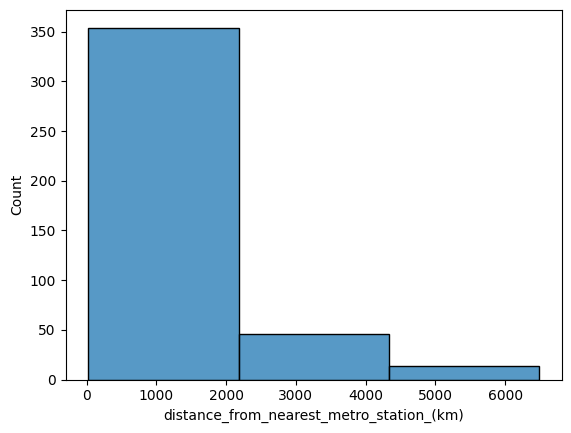

In [79]:
sns.histplot(df['distance_from_nearest_metro_station_(km)'],bins=3)

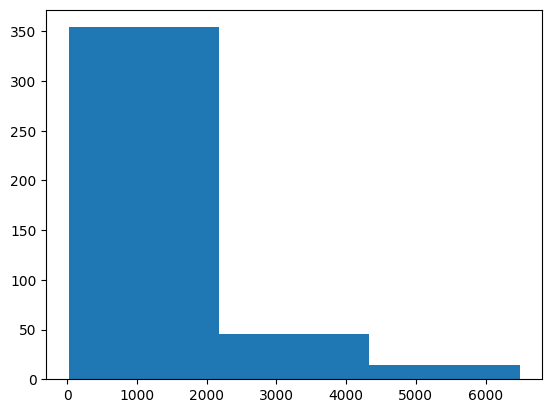

In [82]:
df=make_bins(df,'distance_from_nearest_metro_station_(km)')
replace_func(df,df.groupby(['distance_from_nearest_metro_station_(km)_range'])['house_price_of_unit_area'].mean().to_dict(),'distance_from_nearest_metro_station_(km)_range')

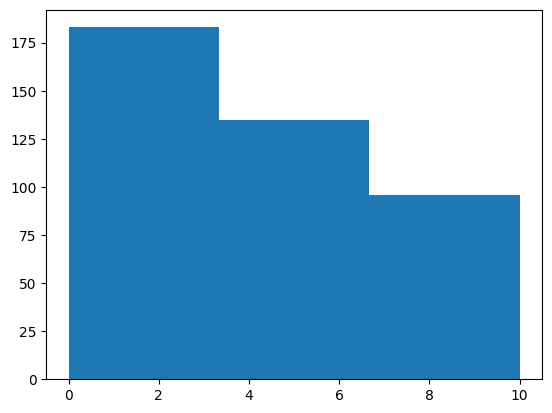

In [86]:
df=make_bins(df,'number_of_convenience_stores')
replace_func(df,df.groupby(['number_of_convenience_stores_range'])['house_price_of_unit_area'].mean().to_dict(),'number_of_convenience_stores_range')

In [87]:
correlation(df)

transaction_date                                  0.067250
house_age                                        -0.281753
distance_from_nearest_metro_station_(km)         -0.775948
number_of_convenience_stores                      0.617333
latitude                                          0.578419
longitude                                         0.437672
number_of_bedrooms                                0.061932
house_size_(sqft)                                 0.050732
house_price_of_unit_area                          1.000000
house_age_range                                   0.320057
distance_from_nearest_metro_station_(km)_range    0.510708
number_of_convenience_stores_range                0.610155
Name: house_price_of_unit_area, dtype: float64

In [94]:
df['latitude']=df['latitude'].astype(str)
df['longitude']=df['longitude'].astype(str)

In [97]:
df['area_loc']=df['latitude']+' '+df['longitude']

In [100]:
loc_range=df.groupby(['area_loc'])['house_price_of_unit_area'].mean().to_dict()

In [102]:
df['area_loc']=df['area_loc'].replace(loc_range)

In [106]:
correlation(df)

transaction_date                                  0.067250
house_age                                        -0.281753
distance_from_nearest_metro_station_(km)         -0.775948
number_of_convenience_stores                      0.617333
number_of_bedrooms                                0.061932
house_size_(sqft)                                 0.050732
house_price_of_unit_area                          1.000000
house_age_range                                   0.320057
distance_from_nearest_metro_station_(km)_range    0.510708
number_of_convenience_stores_range                0.610155
area_loc                                          0.978551
Name: house_price_of_unit_area, dtype: float64

In [107]:
df.drop(columns=['latitude','longitude','transaction_date'],inplace=True)

In [108]:
correlation(df)

house_age                                        -0.281753
distance_from_nearest_metro_station_(km)         -0.775948
number_of_convenience_stores                      0.617333
number_of_bedrooms                                0.061932
house_size_(sqft)                                 0.050732
house_price_of_unit_area                          1.000000
house_age_range                                   0.320057
distance_from_nearest_metro_station_(km)_range    0.510708
number_of_convenience_stores_range                0.610155
area_loc                                          0.978551
Name: house_price_of_unit_area, dtype: float64

In [109]:
df.head()

,house_age,distance_from_nearest_metro_station_(km),number_of_convenience_stores,number_of_bedrooms,house_size_(sqft),house_price_of_unit_area,house_age_range,distance_from_nearest_metro_station_(km)_range,number_of_convenience_stores_range,area_loc
0,32.0,84.87882,10,1,575,37.9,37.201000,40.762147,46.643750,37.900000
1,19.5,306.59470,9,2,1240,42.2,32.376744,40.762147,46.643750,42.200000
2,13.3,561.98450,5,3,1060,47.3,42.308649,40.762147,43.672593,47.500000
3,13.3,561.98450,5,2,875,54.8,42.308649,40.762147,43.672593,47.500000
4,5.0,390.56840,5,1,491,43.1,42.308649,40.762147,43.672593,45.183333


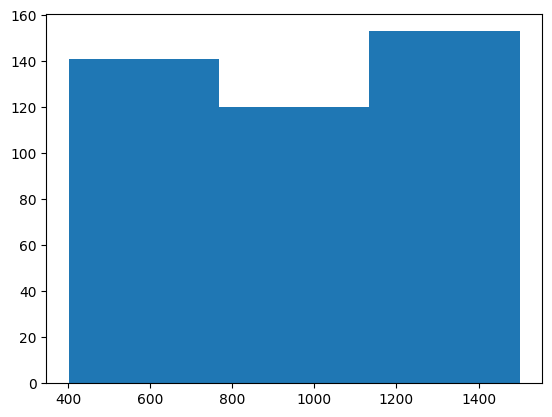

In [111]:
df=make_bins(df,'house_size_(sqft)')
replace_func(df,df.groupby(['house_size_(sqft)_range'])['house_price_of_unit_area'].mean().to_dict(),'house_size_(sqft)_range')

In [112]:
correlation(df)

house_age                                        -0.281753
distance_from_nearest_metro_station_(km)         -0.775948
number_of_convenience_stores                      0.617333
number_of_bedrooms                                0.061932
house_size_(sqft)                                 0.050732
house_price_of_unit_area                          1.000000
house_age_range                                   0.320057
distance_from_nearest_metro_station_(km)_range    0.510708
number_of_convenience_stores_range                0.610155
area_loc                                          0.978551
house_size_(sqft)_range                           0.069101
Name: house_price_of_unit_area, dtype: float64

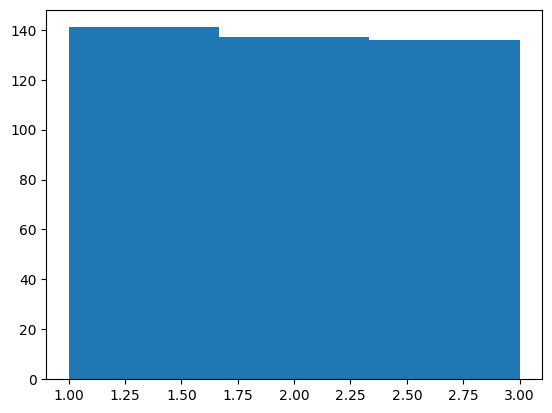

In [113]:
df=make_bins(df,'number_of_bedrooms')
replace_func(df,df.groupby(['number_of_bedrooms_range'])['house_price_of_unit_area'].mean().to_dict(),'number_of_bedrooms_range')

In [114]:
correlation(df)

house_age                                        -0.281753
distance_from_nearest_metro_station_(km)         -0.775948
number_of_convenience_stores                      0.617333
number_of_bedrooms                                0.061932
house_size_(sqft)                                 0.050732
house_price_of_unit_area                          1.000000
house_age_range                                   0.320057
distance_from_nearest_metro_station_(km)_range    0.510708
number_of_convenience_stores_range                0.610155
area_loc                                          0.978551
house_size_(sqft)_range                           0.069101
number_of_bedrooms_range                          0.091685
Name: house_price_of_unit_area, dtype: float64

In [115]:
df.head()

,house_age,distance_from_nearest_metro_station_(km),number_of_convenience_stores,number_of_bedrooms,house_size_(sqft),house_price_of_unit_area,house_age_range,distance_from_nearest_metro_station_(km)_range,number_of_convenience_stores_range,area_loc,house_size_(sqft)_range,number_of_bedrooms_range
0,32.0,84.87882,10,1,575,37.9,37.201000,40.762147,46.643750,37.900000,37.741844,37.741844
1,19.5,306.59470,9,2,1240,42.2,32.376744,40.762147,46.643750,42.200000,39.238562,36.782482
2,13.3,561.98450,5,3,1060,47.3,42.308649,40.762147,43.672593,47.500000,36.655833,39.433824
3,13.3,561.98450,5,2,875,54.8,42.308649,40.762147,43.672593,47.500000,36.655833,36.782482
4,5.0,390.56840,5,1,491,43.1,42.308649,40.762147,43.672593,45.183333,37.741844,37.741844


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 12 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   house_age                                       414 non-null    float64
 1   distance_from_nearest_metro_station_(km)        414 non-null    float64
 2   number_of_convenience_stores                    414 non-null    int64  
 3   number_of_bedrooms                              414 non-null    int64  
 4   house_size_(sqft)                               414 non-null    int64  
 5   house_price_of_unit_area                        414 non-null    float64
 6   house_age_range                                 414 non-null    float64
 7   distance_from_nearest_metro_station_(km)_range  414 non-null    float64
 8   number_of_convenience_stores_range              414 non-null    float64
 9   area_loc                                   

In [138]:
X=df.drop(columns=['house_price_of_unit_area'])
y=df['house_price_of_unit_area']

In [139]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [140]:
from sklearn.feature_selection import VarianceThreshold
var_const=VarianceThreshold()
var_quasi_const=VarianceThreshold(threshold=0.01)

In [141]:
print('Before:',X_train.shape)
var_const.fit(X_train,y_train)
var_quasi_const.fit(X_train,y_train)
rem_col=X_train.columns[~var_const.get_support()]
X_train.drop(columns=rem_col,inplace=True)
X_test.drop(columns=rem_col,inplace=True)
rem_col=X_train.columns[~var_quasi_const.get_support()]
X_train.drop(columns=rem_col,inplace=True)
X_test.drop(columns=rem_col,inplace=True)
print('After:',X_train.shape)

Before: (331, 11)
After: (331, 11)


In [219]:
from sklearn.feature_selection import mutual_info_regression
clss=[]
for i in X_train.columns:
    clss.append(mutual_info_regression(X_train[i].values.reshape(-1,1),y_train)[0])

In [224]:
df1=pd.DataFrame(clss,index=X_train.columns,columns=['inf_gain'])
rem_col=df1[df1['inf_gain']==0].index

In [226]:
X_train.drop(columns=rem_col,inplace=True)
X_test.drop(columns=rem_col,inplace=True)

In [257]:
X_train

,house_age,distance_from_nearest_metro_station_(km),number_of_convenience_stores,house_age_range,distance_from_nearest_metro_station_(km)_range,number_of_convenience_stores_range,area_loc
192,43.8,57.58945,7,37.201000,40.762147,46.643750,42.70
234,8.0,2216.61200,4,42.308649,23.173913,43.672593,23.90
5,7.1,2175.03000,3,42.308649,40.762147,29.236066,29.90
45,36.6,488.81930,8,37.201000,40.762147,46.643750,38.20
245,7.5,639.61980,5,42.308649,40.762147,43.672593,40.80
...,...,...,...,...,...,...,...
71,35.5,640.73910,3,37.201000,40.762147,29.236066,51.15
106,17.2,189.51810,8,32.376744,40.762147,46.643750,47.10
270,10.8,252.58220,1,42.308649,40.762147,29.236066,117.50
348,4.6,259.66070,6,42.308649,40.762147,43.672593,58.45


In [258]:
X_train.drop(columns='number_of_convenience_stores',inplace=True)
X_test.drop(columns='number_of_convenience_stores',inplace=True)

# Model building 

# Linear Regression

For linear regression the assumptions are that the data should be normally distributed and there are no outliers and no multi collinearity should exist between the features

### So first I will check the multi collinearity and remove the highly correlated features and then I will check for the outliers by using the boxplot and remove the outliers by the iqr method and than transform it if it is not normally distributed

In [259]:
X_train_lr=X_train.copy()
X_test_lr=X_test.copy()
# .copy() function helps  for deep copy which means that the changes made in X_train_lr will not affect on X_train

In [260]:
X_train_lr.shape,X_test_lr.shape

((331, 6), (83, 6))

In [261]:
def correlation(df,thres):
    corr=df.corr(method='spearman')
    rem_col=set()
    for i in range(len(corr.columns)):
        for j in range(i):
            if(abs(corr.iloc[i,j])>thres):
                rem_col.add(corr.columns[i])
    return rem_col

In [262]:
rem_col=correlation(X_train_lr,0.85)

In [263]:
X_train_lr.drop(columns=rem_col,inplace=True)
X_test_lr.drop(columns=rem_col,inplace=True)

#### Now for removing the multi collinear features I am using the correlation matrix for this.In this all the features which have a covariance of more than 0.85 those features are removed
#### There is also a VIF method to remove the multi collinear features.In this method first the vif is calculated for each of the independent feature and if the vif value is greater than 5 we remove those features

# Check for outliers

What are outliers?
Outliers are those data points which do not follow the normal trend as shown by the other points.

Methods to detect outliers in a data:

1. BOX PLOT METHOD
2. KDE PLOT (IF KDE PLOT IS NORMALLY DISTRIBUTED THEN THE FEATURE IS OUTLIER FREE BUT IF THERE IS SKEWNESS WEB HAVE OUTLIERS THERE
3. BY DRAWING THE SCATTER PLOT

Methods to handle them:

1. IQR METHOD -
    In this method we find the 25 th percentile ,75th percentile and than the iqr(iqr=q3-q1) and if the values are greater than     q3+1.5*iqr and if the values are less than q1-1.5*iqr we call these outliers and replace them with the up_limit and lower       limit
2. Z score method-
    In this method we cal the z score of each Xi which converts the data into Standard normal distribution and all the values       which are greater than 3 or less than -3 we replace those with 3 or -3
3. By binning
4. By treating the outliers like missing values and using a ml model to predict the values
5. By replacing those with max value in the data
  

In [264]:
X_train_lr.head()

,house_age,distance_from_nearest_metro_station_(km),house_age_range,distance_from_nearest_metro_station_(km)_range,number_of_convenience_stores_range,area_loc
192,43.8,57.58945,37.201000,40.762147,46.643750,42.7
234,8.0,2216.61200,42.308649,23.173913,43.672593,23.9
5,7.1,2175.03000,42.308649,40.762147,29.236066,29.9
45,36.6,488.81930,37.201000,40.762147,46.643750,38.2
245,7.5,639.61980,42.308649,40.762147,43.672593,40.8


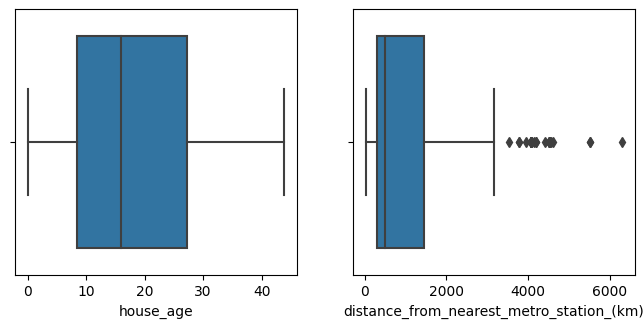

In [265]:
t=1
plt.figure(figsize=(8,20))
for i in ['house_age','distance_from_nearest_metro_station_(km)']:
    plt.subplot(5,2,t)
    sns.boxplot(x=i,data=X_train_lr)
    t+=1

In [266]:
q1=X_train_lr['distance_from_nearest_metro_station_(km)'].quantile(0.25)

q3=X_train_lr['distance_from_nearest_metro_station_(km)'].quantile(0.75)
iqr=q3-q1
up_lim=q3+1.5*iqr
low_lim=q1-1.5*iqr
X_train_lr['distance_from_nearest_metro_station_(km)']=np.where(X_train_lr['distance_from_nearest_metro_station_(km)']>up_lim,up_lim,
                   np.where(X_train_lr['distance_from_nearest_metro_station_(km)']<low_lim,low_lim,X_train_lr['distance_from_nearest_metro_station_(km)']))

<AxesSubplot: xlabel='distance_from_nearest_metro_station_(km)'>

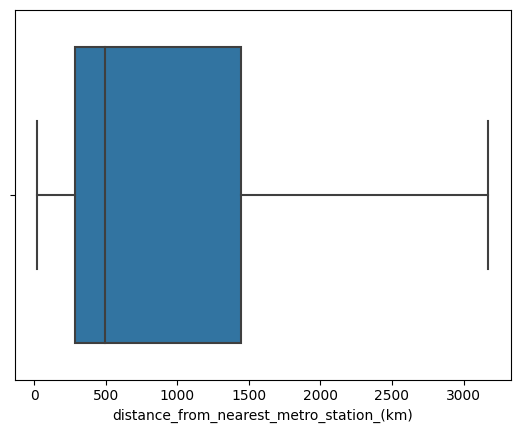

In [267]:
sns.boxplot(x='distance_from_nearest_metro_station_(km)',data=X_train_lr)

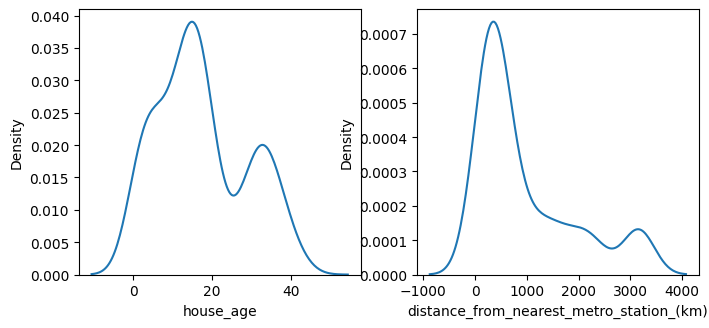

In [268]:
t=1
plt.figure(figsize=(8,20))
for i in ['house_age','distance_from_nearest_metro_station_(km)']:
    plt.subplot(5,2,t)
    sns.kdeplot(x=i,data=X_train_lr)
    t+=1

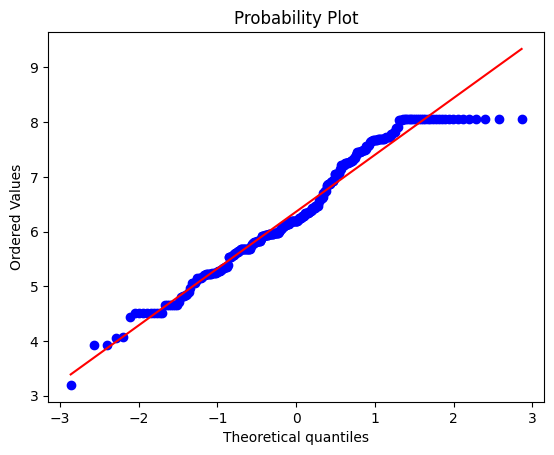

In [237]:
import scipy.stats as stats
stats.probplot(np.log1p(X_train_lr['distance_from_nearest_metro_station_(km)']),dist='norm',plot=plt)
plt.show()

In [269]:
X_train_lr['distance_from_nearest_metro_station_(km)']=np.log1p(X_train_lr['distance_from_nearest_metro_station_(km)'])

In [185]:
# model buillding

#### Now comes the scaling part  

In this part we will either use Standardiation or normalization to scale our features.Scaling is essential in Linear Regression because in the background the model uses Gradient Descent algorithm to minimize the cost function.And if don't do scaling the gradient descent will take long to converge therefore scaling is recommended

In scaling we can either use Standardization-
In this method we bring the features to standard normal distribution such that the mean is zero and std is 1
In Normalization-In this method the formula given below is to scale down the features between 0 to 1


In [270]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train_sc=sc.fit_transform(X_train_lr,y_train)
X_test_sc=sc.transform(X_test_lr)

In [271]:
from sklearn.linear_model import LinearRegression

In [272]:
lr=LinearRegression()

In [273]:
lr.fit(X_train_sc,y_train)

LinearRegression()

In [274]:
from sklearn.metrics import r2_score
# like accuracy in classification problem r2 score is called the accuracy for regression problems

In [275]:
r2_score(y_test,lr.predict(X_test_sc))

-36.36706390237553

In [276]:
# the r2 score is negative which means the model is performing poor than the average model

# Now applying the Knn model

Now the Knn model means Knearest neighbour it simply finds the distance between the test points and the training points and depending on the value of k it will take average of k points 

In [279]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

In [280]:
knn.fit(X_train_sc,y_train)

KNeighborsRegressor()

In [281]:
r2_score(y_test,knn.predict(X_test_sc))

-0.06743418845259819

In [282]:
param_knn={'n_neighbors':[int(x) for x in np.linspace(5,32,2)],
          'weights':['distance','uniform'],
          'p':[1,2]}

In [283]:
from sklearn.model_selection import GridSearchCV


In [284]:
grid_knn=GridSearchCV(knn,param_knn,verbose=3,cv=5,scoring='r2')

In [285]:
grid_knn.fit(X_train_sc,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END n_neighbors=5, p=1, weights=distance;, score=0.754 total time=   0.0s
[CV 2/5] END n_neighbors=5, p=1, weights=distance;, score=0.808 total time=   0.0s
[CV 3/5] END n_neighbors=5, p=1, weights=distance;, score=0.913 total time=   0.0s
[CV 4/5] END n_neighbors=5, p=1, weights=distance;, score=0.872 total time=   0.0s
[CV 5/5] END n_neighbors=5, p=1, weights=distance;, score=0.624 total time=   0.0s
[CV 1/5] END n_neighbors=5, p=1, weights=uniform;, score=0.710 total time=   0.0s
[CV 2/5] END n_neighbors=5, p=1, weights=uniform;, score=0.809 total time=   0.0s
[CV 3/5] END n_neighbors=5, p=1, weights=uniform;, score=0.880 total time=   0.0s
[CV 4/5] END n_neighbors=5, p=1, weights=uniform;, score=0.863 total time=   0.0s
[CV 5/5] END n_neighbors=5, p=1, weights=uniform;, score=0.636 total time=   0.0s
[CV 1/5] END n_neighbors=5, p=2, weights=distance;, score=0.799 total time=   0.0s
[CV 2/5] END n_neighbors=5, p=2,

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [5, 32], 'p': [1, 2],
                         'weights': ['distance', 'uniform']},
             scoring='r2', verbose=3)

In [286]:
r2_score(y_test,grid_knn.predict(X_test_sc))

-0.06729781896500886

In [287]:
r2_score(y_train,grid_knn.predict(X_train_sc))

0.9908801749964097

# The model is overfitting since the r2 score for the train and test data are varyinng too much

# SVR

In this model we try to maximize the distance between the marginal planes

In [289]:
from sklearn.svm import SVR
svr=SVR()

In [290]:
svr.fit(X_train,y_train)

SVR()

In [291]:
r2_score(y_test,svr.predict(X_test))

0.6179279882766548

In [292]:
r2_score(y_train,svr.predict(X_train))

0.5022058151246065

In [293]:
from sklearn.model_selection import cross_val_score

In [296]:
cross_val_score(svr,X_test,y_test,cv=10,scoring='r2').mean()

0.3344951798411008

In [297]:
cross_val_score(svr,X_train,y_train,cv=10,scoring='r2').mean()

0.4906147309597622

# Decision Tree Regressor

This model finds the information gain(1-entropy) to choose the best feature as the root node and subsequent nodes.The decision tree continues to grow until a pure node(entropy=0 /1) is attained

Advantage-
1. No scaling is required
2. Works well for both the classification as well regression model

Disadvantage-
1. Prone to overfitting

In [298]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(random_state=42)

In [299]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [300]:
cross_val_score(dt,X_test,y_test,cv=10,scoring='r2').mean()

0.8855517336430916

In [301]:
cross_val_score(dt,X_train,y_train,cv=10,scoring='r2').mean()

0.7989662555273421

In [302]:
param_dt={'ccp_alpha':dt.cost_complexity_pruning_path(X_train,y_train).ccp_alphas}

In [303]:
grid_dt=GridSearchCV(dt,param_dt,cv=5,scoring='r2',verbose=3)

In [304]:
grid_dt.fit(X_train,y_train)

Fitting 5 folds for each of 233 candidates, totalling 1165 fits
[CV 1/5] END .....................ccp_alpha=0.0;, score=0.921 total time=   0.0s
[CV 2/5] END .....................ccp_alpha=0.0;, score=0.555 total time=   0.0s
[CV 3/5] END .....................ccp_alpha=0.0;, score=0.929 total time=   0.0s
[CV 4/5] END .....................ccp_alpha=0.0;, score=0.874 total time=   0.0s
[CV 5/5] END .....................ccp_alpha=0.0;, score=0.825 total time=   0.0s
[CV 1/5] END ..ccp_alpha=1.0303942995916862e-15;, score=0.921 total time=   0.0s
[CV 2/5] END ..ccp_alpha=1.0303942995916862e-15;, score=0.555 total time=   0.0s
[CV 3/5] END ..ccp_alpha=1.0303942995916862e-15;, score=0.929 total time=   0.0s
[CV 4/5] END ..ccp_alpha=1.0303942995916862e-15;, score=0.874 total time=   0.0s
[CV 5/5] END ..ccp_alpha=1.0303942995916862e-15;, score=0.825 total time=   0.0s
[CV 1/5] END ...ccp_alpha=1.373859066122248e-15;, score=0.921 total time=   0.0s
[CV 2/5] END ...ccp_alpha=1.373859066122248e-

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'ccp_alpha': array([0.00000000e+00, 1.03039430e-15, 1.37385907e-15, 2.74771813e-15,
       1.51057402e-05, 1.51057402e-05, 1.51057402e-05, 1.51057402e-05,
       1.51057402e-05, 1.51057402e-05, 1.51057402e-05, 1.51057402e-05,
       1.51057402e-05, 1.51057402e-05, 1.51057402e-05, 1.51057402e-05,
       1.51057402e-...
       1.00336103e-01, 1.02118337e-01, 1.10245804e-01, 1.11787513e-01,
       1.20345869e-01, 1.24175898e-01, 1.27396274e-01, 1.27617616e-01,
       1.30828466e-01, 1.71702959e-01, 1.96343220e-01, 2.44912920e-01,
       2.83547114e-01, 3.60303374e-01, 4.24033859e-01, 6.52835415e-01,
       1.03311317e+00, 1.47953801e+00, 1.96637839e+00, 3.37703948e+00,
       8.34474089e+00, 9.22116441e+00, 1.05550726e+01, 2.85453491e+01,
       1.13372513e+02])},
             scoring='r2', verbose=3)

In [305]:
cross_val_score(grid_dt.best_estimator_,X_test,y_test,cv=10,scoring='r2').mean()

0.9243871867990883

In [306]:
cross_val_score(grid_dt.best_estimator_,X_train,y_train,cv=10,scoring='r2').mean()

0.8220314464921857

# Random Forest Regressor

This is a bagging ensemble method.The model trains the n decision tree parallelly by giving a subset of the total data set as training data for each decision tree .This reduces the overfitting nature of decision tree

In [307]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=42)

In [308]:
rfr.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [309]:
cross_val_score(rfr,X_test,y_test,cv=10,scoring='r2').mean()

0.9303110035991334

In [310]:
cross_val_score(rfr,X_train,y_train,cv=10,scoring='r2').mean()

0.9133203081937487

# Bagging Regressor

This is a ensemble method which works on parallel learning

In [311]:
from sklearn.ensemble import BaggingRegressor
bgr=BaggingRegressor(base_estimator=dt)

In [313]:
cross_val_score(bgr,X_test,y_test,cv=10,scoring='r2').mean()

0.9281681424787592

In [314]:
cross_val_score(bgr,X_train,y_train,cv=10,scoring='r2').mean()

0.9127316598377568

# Gradient Boosting

This is a Boosting method which works on sequential learning.In this method first a base model makes a prediction which is generally 0.5  or the average of the training data Then the features and the error is sent to the decision tree for training.

In [315]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(random_state=
                             42)

In [316]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor(random_state=42)

In [317]:
cross_val_score(gbr,X_test,y_test,cv=10,scoring='r2').mean()

0.9305150193101079

In [318]:
cross_val_score(gbr,X_train,y_train,cv=10,scoring='r2').mean()

0.916502842047457

# Voting Regressor

In [319]:
from sklearn.ensemble import VotingRegressor
est=[('rfr',rfr),('gbr',gbr)]
vr=VotingRegressor(estimators=est)

In [320]:
vr.fit(X_train,y_train)

VotingRegressor(estimators=[('rfr', RandomForestRegressor(random_state=42)),
                            ('gbr',
                             GradientBoostingRegressor(random_state=42))])

In [321]:
cross_val_score(vr,X_test,y_test,cv=10,scoring='r2').mean()

0.9318312286993405

In [322]:
cross_val_score(vr,X_train,y_train,cv=10,scoring='r2').mean()

0.9172504057095912

# Ada Boost Regressor

This is a also a Boosting ensemble method which trains the model sequentially.In this method we take a decision stump as the base model.A decision stump is decision tree with max depth of 1 that is only two root nodes.First equal weights are assigned to each data points.After the first prediction is done by the first decision stump the total error is calculated by adding the weights of the incorrect point and the performance of the stump is calculated.After calculation new weights are assigned to each data point (The incorrect data point has its weight increased whereas the correct the data point  the weights are decreased.

In [324]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(random_state=42)

In [325]:
ada.fit(X_train,y_train)

AdaBoostRegressor(random_state=42)

In [326]:
cross_val_score(ada,X_test,y_test,cv=10,scoring='r2').mean()

0.9438836913524125

In [327]:
cross_val_score(ada,X_train,y_train,cv=10,scoring='r2').mean()

0.9100657520683892

# So as we can see that ADA boost model performed well among all the model but the problem with Adaboost is that it is sensitive to outliers.The second best model voting regressor (A type of ensemble method) is made of random forest and gradient boosting model(but the issue with gradient boosting is that it is sensitive to outliers and it prone to overfitting easily  where as the random forest has no such issue So according to me the best model is Random forest as it has no disadvantages

In [330]:
rfr.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [331]:
y_pred=rfr.predict(X_test)

In [336]:
ans=y_test.reset_index()
ans['predicted_price']=y_pred

In [338]:
ans.rename(columns={'house_price_of_unit_area':'actual_price'},inplace=True)

In [340]:
ans.drop(columns=['index'],inplace=True)

In [342]:
ans.to_csv('PREDICTION_FOR_TEST_DATA.csv',index=False)